In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from keras import Sequential

from keras import layers
import keras
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Activation
from keras.layers import Dropout
import pickle
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import keras.backend as K
#from keras.backend import ModelCheckpoint

In [6]:
subjectList = pd.read_csv("/mnt/e/GrandCanyonSAR_analysis/data/participantID1.csv", header=None)
subjectList = subjectList.to_numpy()

In [20]:
prepreFolder = "/mnt/e/GrandCanyonSAR_analysis/src/teleoperatorModelLSTM/exportedTrajectoryTeleoperatorModelling/windowSize_5/"

accumulateXtrajSegments = []
accumulateYtrajSegments = []
accumulateZtrajSegments = []
accumulateXswarmCentroid = []
accumulateZswarmCentroid = []
accumulateXswarmStd = []
accumulateZswarmStd = []
accumulateOutputXacc = []
accumulateOutputYacc = []
accumulateOutputZacc = []
accumulateOutputXvel = []
accumulateOutputYvel = []
accumulateOutputZvel = []
accumulatePersonKnowledge = []
accumulateTerrainKnowledge = []
c = 0
for i in subjectList:
    prefolder = prepreFolder + str(i[0]) + "/"
    fileName = prefolder + "accumulateXtrajSegments.csv"
    temp1 = pd.read_csv(fileName, header=None)
    temp1 = temp1.to_numpy()

    fileName = prefolder + "accumulateYtrajSegments.csv"
    temp2 = pd.read_csv(fileName, header=None)
    temp2 = temp2.to_numpy()

    fileName = prefolder + "accumulateZtrajSegments.csv"
    temp3 = pd.read_csv(fileName, header=None)
    temp3 = temp3.to_numpy()
    
    fileName = prefolder + "accumulateXswarmCentroid.csv"
    temp4 = pd.read_csv(fileName, header=None)
    temp4 = temp4.to_numpy()
    
    fileName = prefolder + "accumulateZswarmCentroid.csv"
    temp5 = pd.read_csv(fileName, header=None)
    temp5 = temp5.to_numpy()
    
    fileName = prefolder + "accumulateXswarmStd.csv"
    temp6 = pd.read_csv(fileName, header=None)
    temp6 = temp6.to_numpy()
    
    fileName = prefolder + "accumulateZswarmStd.csv"
    temp7 = pd.read_csv(fileName, header=None)
    temp7 = temp7.to_numpy()
    
    fileName = prefolder + "accumulateOutputXacc.csv"
    temp8 = pd.read_csv(fileName, header=None)
    temp8 = temp8.to_numpy()
    
    fileName = prefolder + "accumulateOutputYacc.csv"
    temp9 = pd.read_csv(fileName, header=None)
    temp9 = temp9.to_numpy()
    
    fileName = prefolder + "accumulateOutputZacc.csv"
    temp10 = pd.read_csv(fileName, header=None)
    temp10 = temp10.to_numpy()
    
    fileName = prefolder + "accumulateOutputXvel.csv"
    temp11 = pd.read_csv(fileName, header=None)
    temp11 = temp11.to_numpy()

    fileName = prefolder + "accumulateOutputYvel.csv"
    temp12 = pd.read_csv(fileName, header=None)
    temp12 = temp12.to_numpy()
    
    fileName = prefolder + "accumulateOutputZvel.csv"
    temp13 = pd.read_csv(fileName, header=None)
    temp13 = temp13.to_numpy()
    
    fileName = prefolder + "accumulatePersonKnowledge.csv"
    temp14 = pd.read_csv(fileName, header=None)
    temp14 = temp14.to_numpy()
    
    fileName = prefolder + "accumulateTerrainKnowledge.csv"
    temp15 = pd.read_csv(fileName, header=None)
    temp15 = temp15.to_numpy()
    
    
    if c == 0:
        accumulateXtrajSegments = np.array(temp1, copy=True)
        accumulateYtrajSegments = np.array(temp2, copy=True)
        accumulateZtrajSegments = np.array(temp3, copy=True)
        accumulateXswarmCentroid = np.array(temp4, copy=True)
        accumulateZswarmCentroid = np.array(temp5, copy=True)
        accumulateXswarmStd = np.array(temp6, copy=True)
        accumulateZswarmStd = np.array(temp7, copy=True)
        accumulateOutputXacc = np.array(temp8, copy=True)
        accumulateOutputYacc = np.array(temp9, copy=True)
        accumulateOutputZacc = np.array(temp10, copy=True)
        accumulateOutputXvel = np.array(temp11, copy=True)
        accumulateOutputYvel = np.array(temp12, copy=True)
        accumulateOutputZvel = np.array(temp13, copy=True)
        accumulatePersonKnowledge = np.array(temp14, copy=True)
        accumulateTerrainKnowledge = np.array(temp15, copy=True)
        c = 1
    else:
        accumulateXtrajSegments = np.vstack((accumulateXtrajSegments,temp1))
        accumulateYtrajSegments = np.vstack((accumulateYtrajSegments,temp2))
        accumulateZtrajSegments = np.vstack((accumulateZtrajSegments,temp3))
        accumulateXswarmCentroid = np.vstack((accumulateXswarmCentroid,temp4))
        accumulateZswarmCentroid = np.vstack((accumulateZswarmCentroid,temp5))
        accumulateXswarmStd = np.vstack((accumulateXswarmStd,temp6))
        accumulateZswarmStd = np.vstack((accumulateZswarmStd,temp7))
        accumulateOutputXacc = np.vstack((accumulateOutputXacc,temp8))
        accumulateOutputYacc = np.vstack((accumulateOutputYacc,temp9))
        accumulateOutputZacc = np.vstack((accumulateOutputZacc,temp10))
        accumulateOutputXvel = np.vstack((accumulateOutputXvel,temp11))
        accumulateOutputYvel = np.vstack((accumulateOutputYvel,temp12))
        accumulateOutputZvel = np.vstack((accumulateOutputZvel,temp13))
        accumulatePersonKnowledge = np.vstack((accumulatePersonKnowledge,temp14))
        accumulateTerrainKnowledge = np.vstack((accumulateTerrainKnowledge,temp15))

In [21]:
inputTrajectories = np.dstack([accumulateXtrajSegments,accumulateYtrajSegments,accumulateZtrajSegments])
inputStaticParameters = np.hstack((accumulateXswarmCentroid,accumulateZswarmCentroid,accumulateXswarmStd,accumulateZswarmStd,accumulateOutputXacc,accumulateOutputYacc,accumulateOutputZacc,
                                   accumulatePersonKnowledge,accumulateTerrainKnowledge))
outputData = np.hstack((accumulateOutputXacc,accumulateOutputYacc,accumulateOutputZacc,accumulateOutputXvel,accumulateOutputYvel,accumulateOutputZvel))

In [30]:
randInd = np.random.permutation(inputTrajectories.shape[0])
inputTrajectories_shuffled = np.array(inputTrajectories, copy=True)
inputStaticParameters_shuffled = np.array(inputStaticParameters, copy=True)
outputData_shuffled = np.array(outputData, copy=True)
#np.take(inputTrajectories,randInd,axis=0,out=inputTrajectories_shuffled)
#np.take(inputStaticParameters,randInd,axis=0,out=inputStaticParameters_shuffled)
#np.take(outputData,randInd,axis=0,out=outputData_shuffled)

In [22]:
inputTrajectories.shape

(9062, 120, 3)

In [24]:
inputStaticParameters.shape

(9062, 9)

In [25]:
outputData.shape

(9062, 6)

In [26]:
input1 = keras.layers.Input(shape=(120,3 ))
x1 = Bidirectional(LSTM(200, activation='tanh', return_sequences=True))(input1)
x1 = Bidirectional(LSTM(200, activation='tanh',return_sequences=False))(x1)
#x1 = Bidirectional(LSTM(200, activation='tanh',return_sequences=False))(x1)

input2 =  keras.layers.Input(shape=(9, ))
x2 = Dense(32,activation=keras.activations.relu)(input2)
x2 = Dense(7,activation=keras.activations.tanh)(x2)

merged = keras.layers.Concatenate(axis=1)([x1, x2])
x3 = keras.layers.Flatten()(merged)
x3 = Dense(100, activation=keras.activations.tanh)(x3)
x3 = Dense(50,activation=keras.activations.tanh)(x3)
x3 = Dense(6,activation=keras.activations.tanh)(x3)
#x3 = Dense(400,activation=keras.activations.tanh)(x3)
#x3 = Dense(300,activation=keras.activations.tanh)(x3)
#x3 = Dense(300,activation=keras.activations.tanh)(x3)
output1 = keras.layers.Reshape((1,6))(x3)




mlModel2 = keras.Model(inputs=[input1, input2], outputs=output1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.01)
mlModel2.compile(loss='mse',optimizer =optimizer,metrics=['mse'])
#mlModel2.compile(loss=focal_loss,optimizer =optimizer,metrics=focal_loss)

In [31]:
keras.backend.clear_session()
history = mlModel2.fit([inputTrajectories_shuffled, inputStaticParameters_shuffled],outputData_shuffled,epochs=60,validation_split=0.3,batch_size=256,verbose=2)

Epoch 1/60
25/25 - 4s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0250 - val_mse: 0.0253 - 4s/epoch - 171ms/step
Epoch 2/60
25/25 - 3s - loss: 0.0402 - mse: 0.0403 - val_loss: 0.0246 - val_mse: 0.0249 - 3s/epoch - 125ms/step
Epoch 3/60
25/25 - 3s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0247 - val_mse: 0.0250 - 3s/epoch - 125ms/step
Epoch 4/60
25/25 - 3s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0248 - val_mse: 0.0250 - 3s/epoch - 122ms/step
Epoch 5/60
25/25 - 3s - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0247 - val_mse: 0.0249 - 3s/epoch - 121ms/step
Epoch 6/60
25/25 - 3s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0253 - val_mse: 0.0255 - 3s/epoch - 122ms/step
Epoch 7/60
25/25 - 3s - loss: 0.0402 - mse: 0.0401 - val_loss: 0.0251 - val_mse: 0.0254 - 3s/epoch - 121ms/step
Epoch 8/60
25/25 - 3s - loss: 0.0402 - mse: 0.0403 - val_loss: 0.0247 - val_mse: 0.0249 - 3s/epoch - 121ms/step
Epoch 9/60
25/25 - 3s - loss: 0.0400 - mse: 0.0401 - val_loss: 0.0246 - val_mse: 0.0249 - 3s/epoch - 121

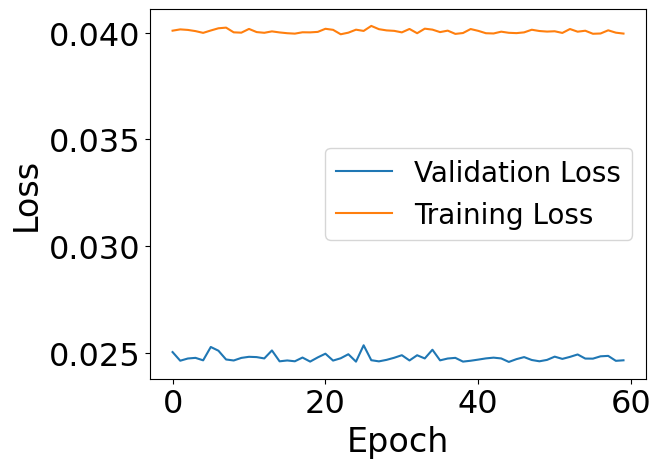

In [32]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Loss', fontsize=24)
#plt.ylim((0, 0.02))
plt.tick_params(axis='both', which='major', labelsize=23)
plt.legend(fontsize=20)